In [10]:
import os 
import numpy as np
import pandas as pd
from Bio import SeqIO

import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

# Files

In [11]:
file_wt = "../../data/temperature/scerevisiae_aminoacid_uniprot_20200120_annot_EZ.fasta"
file_mut= "../../data/temperature/percent_20_annot_EZ.fasta"

# Helper functions

In [12]:
def load_seq(sequence_file):
    df_seq = {"id":[],"seq":[], "pOET":[]}
    for rec in SeqIO.parse(sequence_file, "fasta"):
        df_seq["id"].append(rec.id)
        df_seq["seq"].append(str(rec.seq))
        df_seq["pOET"].append(float(rec.description.split()[-2]))
    return pd.DataFrame(df_seq)
def write_seq(df, file_name):
    with open(file_name, "w") as f:
        for row in df.iterrows():
            f.write(f'>{row[1]["id"]}| predicted ogt: {row[1]["pOET"]} |\n{row[1]["seq"]}\n')

# Load seq

In [13]:
df_seq_wt_all = load_seq(file_wt)
df_seq_mut    = load_seq(file_mut)

# Extract uniprot id

In [14]:
df_seq_mut["Uniprot_id"] = df_seq_mut.apply(lambda x: x["id"].split("_")[0], axis = 1)
df_seq_wt_all["Uniprot_id"] = df_seq_wt_all.apply(lambda x: x["id"].split("|")[1], axis = 1)

# Make wt experiment df

In [15]:
df_seq_wt_batch_2 = df_seq_wt_all.loc[df_seq_wt_all["Uniprot_id"].isin(df_seq_mut["Uniprot_id"])]

# Concat with label

In [16]:
df_seq_mut["Type"] = ["Variants" for _ in range(df_seq_mut.shape[0])]
df_seq_wt_batch_2["Type"] = ["Wild type" for _ in range(df_seq_mut.shape[0])]

df_combined = pd.concat([df_seq_mut, df_seq_wt_batch_2])

/Users/sandravi/opt/miniconda3/envs/YEAST/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Plot Temp Diff

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Variants vs. Wild type: t-test independent samples, P_val:1.910e-02 t=2.363e+00


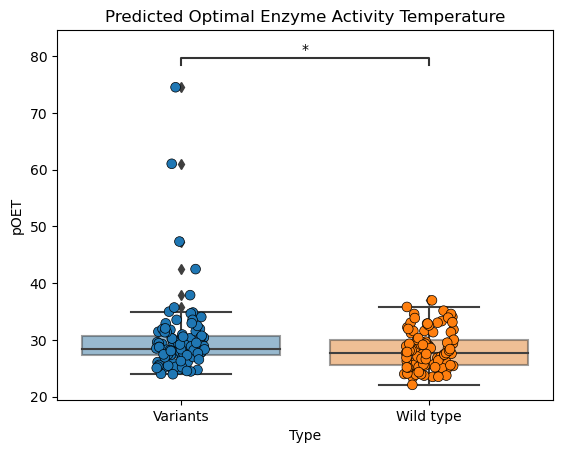

In [17]:
f,ax = plt.subplots()
sns.boxplot(data = df_combined, x = "Type", y="pOET", ax = ax, boxprops={'alpha': 0.5})
sns.stripplot(data=df_combined, x="Type", y="pOET", dodge=True, ax=ax, size=7, edgecolor='k', linewidth=0.5)
#ax.set_ylim([15, 100])
plt.title("Predicted Optimal Enzyme Activity Temperature")

pairs=[("Variants", "Wild type")]
annotator = Annotator(ax, pairs, data=df_combined, x="Type", y="pOET", order=["Variants", "Wild type"])
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()
#ax.set_ylabel("pEOT")
plt.savefig("MGEM_variant_pOET.png", bbox_inches="tight")

# plot scatter 

/Users/sandravi/opt/miniconda3/envs/YEAST/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predictons for Wildtype (pOET)')

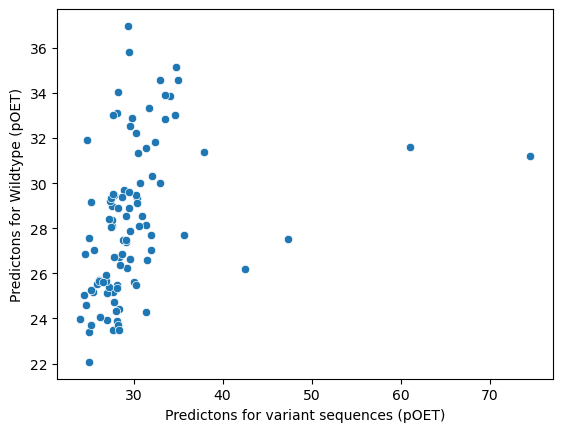

In [20]:
sns.scatterplot(df_seq_mut.sort_values(by="Uniprot_id")["pOET"].values, df_seq_wt_batch_2.sort_values(by="Uniprot_id")["pOET"].values)
plt.xlabel("Predictons for variant sequences (pOET)")
plt.ylabel("Predictons for Wildtype (pOET)")